In [1]:
from src.data_processing import HyperspectralImage, PerturbedSVDataRandomPatches
from torch.utils.data import DataLoader
from src.models import Autoencoder
from src.train_utils import train_model
from src.conf import BATCH_SIZE
from src.loss_functions import balance_loss
import matplotlib.pyplot as plt
import numpy as np
import torch
from src.metrics import compare_endmembers, compare_abundances

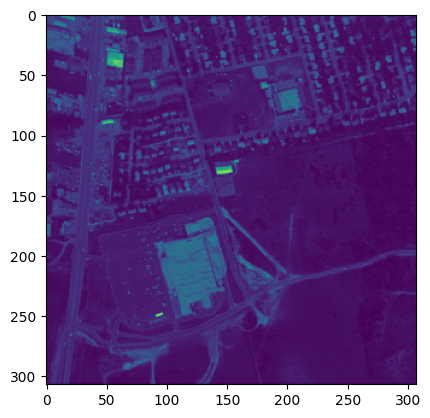

NameError: name 'a' is not defined

In [2]:
urban = HyperspectralImage(image_path="datasets/urban/Urban.mat",
                           ground_truth_path="datasets/urban/end6_groundTruth.mat",
                           n_bands=162, n_row=307, n_col=307, n_sources=6)

X_1_estim = np.load('results/first_estimation/X_1_estim.npy')
A_1_estim = np.load('results/first_estimation/A_1_estim.npy')
S_1_estim = np.load('results/first_estimation/S_1_estim.npy')

plt.imshow(urban.X[0])
plt.show()

sv_random_perturbed_image_dataset = PerturbedSVDataRandomPatches(urban, A_1_estim, S_1_estim)


sv_random_perturbed_image_dataloader = DataLoader(dataset=sv_random_perturbed_image_dataset, batch_size=100, shuffle=True)
# a = next(iter(sv_random_perturbed_image_dataloader))
print('original_image_dataloader', a["X"].shape)
plt.imshow(a['X'][0][0])
plt.show()

TRAINING WILL BE DONE ON cuda:0
 Epoch 1/30
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:04<00:00, 69.25s/it]


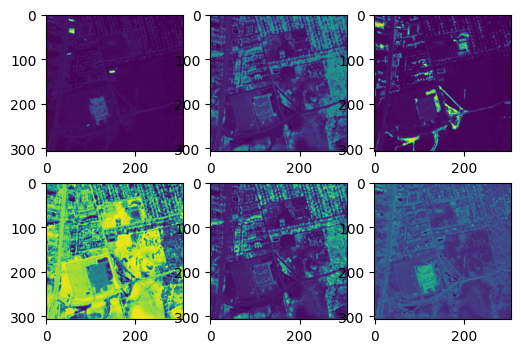

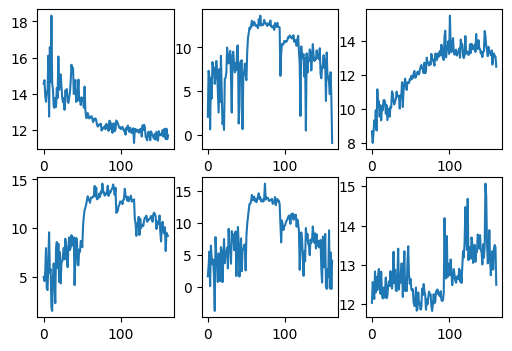

Loss: 17.4319
 Epoch 2/30
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:30<00:00, 70.53s/it]


Loss: 7.7870
 Epoch 3/30
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:44<00:00, 71.22s/it]


Loss: 5.9691
 Epoch 4/30
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:29<00:00, 70.46s/it]


Loss: 5.4426
 Epoch 5/30
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:01<00:00, 69.09s/it]


Loss: 5.0177
 Epoch 6/30
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [22:59<00:00, 68.99s/it]


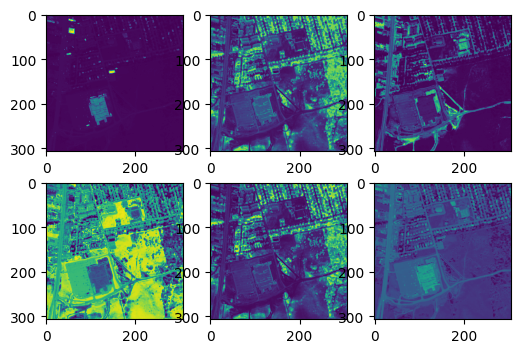

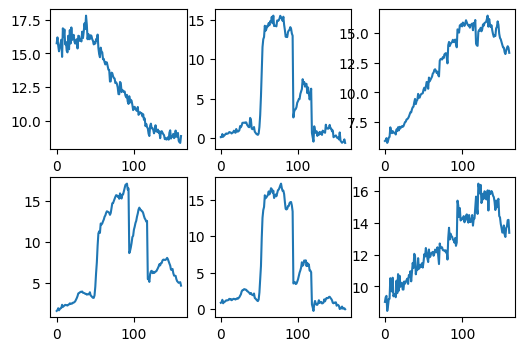

Loss: 4.9050
 Epoch 7/30
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:04<00:00, 69.22s/it]


Loss: 4.7282
 Epoch 8/30
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:05<00:00, 69.26s/it]


Loss: 4.6030
 Epoch 9/30
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:03<00:00, 69.19s/it]


Loss: 4.7424
 Epoch 10/30
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [23:04<00:00, 69.24s/it]


Loss: 4.5607
 Epoch 11/30
----------------------------------------
Learning rate: 0.0095


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [22:58<00:00, 68.95s/it]


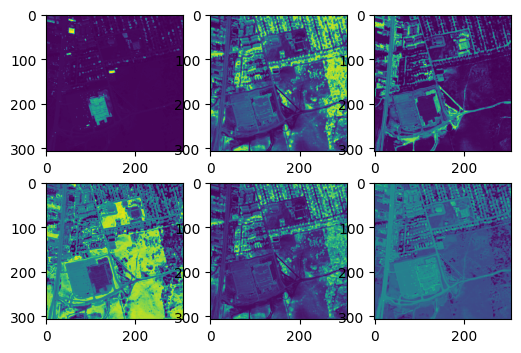

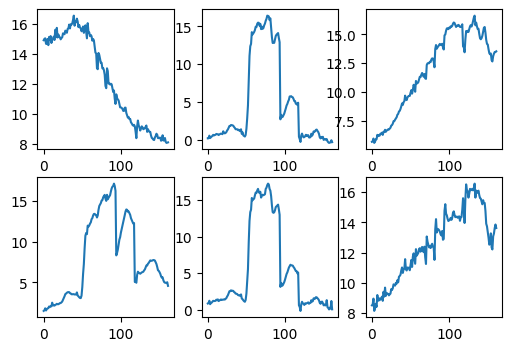

Loss: 4.5201
 Epoch 12/30
----------------------------------------
Learning rate: 0.0095


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [22:57<00:00, 68.85s/it]


Loss: 4.3901
 Epoch 13/30
----------------------------------------
Learning rate: 0.0095


 15%|█████████████████████████▏                                                                                                                                              | 3/20 [03:25<19:25, 68.53s/it]

In [ ]:
model = Autoencoder(channel_number=urban.n_bands, source_number=urban.n_sources)
model, loss_train = train_model(model, urban.X,
                                sv_random_perturbed_image_dataloader,
                                balance_loss, num_epochs=30, n_sources=6, need_plot=True)

In [ ]:

torch.save(model.state_dict(), "results/models_weights/urban_sv_perturbed_random_patches.pth")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

X, A, S = model(torch.Tensor(urban.data[None, :, :, :]).to(device))
X, A, S = X.cpu().detach().numpy()[0], A.cpu().detach().numpy(), S.cpu().detach().numpy()[0]
# Endmembers normalization
for i in range(A.shape[1]):
        M = A[:, i].max().item()
        A[:, i] = A[:, i]/M
                      
print('compare_endmembers', compare_endmembers(urban, A))
plt.figure(figsize=(8,6))
for ii in range(6): 
    ax = plt.subplot(2, 3, ii+1)
    ax.plot(A[:,ii])
plt.show()
                
print('compare_abundances', compare_abundances(urban, S))
plt.figure(figsize=(8,6))
for ii in range(6): 
    ax = plt.subplot(2, 3, ii+1)
    ax.imshow(S[ii, :, :])  
plt.show()